In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [6]:
df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [7]:
df.tail(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26947,26948,1.18,Premium,I,SI1,61.8,58.0,6.78,6.74,4.18,5617
26948,26949,0.35,Ideal,D,SI1,61.6,56.0,4.53,4.49,2.78,827
26949,26950,1.03,Ideal,G,VVS1,62.0,56.0,6.54,6.50,4.04,8398
26950,26951,1.34,Ideal,H,VS2,61.9,55.0,7.05,7.08,4.37,8771
26951,26952,1.14,Ideal,E,VVS2,61.6,57.0,6.68,6.73,4.13,11206
26952,26953,0.31,Premium,E,SI1,58.3,60.0,4.51,4.48,2.62,698
26953,26954,1.02,Premium,G,SI1,62.3,59.0,6.44,6.40,4.00,4718
26954,26955,0.50,Good,G,VVS2,63.8,56.0,5.06,5.03,3.22,1806
26955,26956,0.92,Good,E,SI1,63.3,57.0,6.17,6.22,3.92,3649
26956,26957,0.31,Ideal,E,VS2,62.3,57.0,4.32,4.35,2.70,680


In [10]:
df = df.drop('Unnamed: 0',axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [12]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [14]:
# Replace the numbers in categorical variables with the actual country names in the origin col
df['cut'] = df['cut'].map({'Fair': 1,'Good': 2,'Very Good': 3,'Premium': 4,'Ideal': 5})

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [16]:
# Replace the numbers in categorical variables with the actual country names in the origin col
df['color'] = df['color'].map({'J': 1,'I': 2,'H': 3,'G': 3,'F': 4,'E': 5,'D': 6})

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,5,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,3,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,5,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,4,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,4,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [18]:
# Replace the numbers in categorical variables with the actual country names in the origin col
df['clarity'] = df['clarity'].map({'I3': 1,'I2': 2,'I1': 3,'SI2': 4,'SI1': 5,'VS2': 6,'VS1': 7,'VVS2': 8,'VVS1': 9,'IF': 10,'FL': 11})

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,5,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,3,10,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,5,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,4,7,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,4,9,60.4,59.0,4.35,4.43,2.65,779


In [20]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [26]:
df.drop_duplicates(inplace=True) 

In [27]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [21]:
0 in df.values

True

In [22]:
df.isin([0]).any().any()

True

In [23]:
df.eq(0).any().any()

True

In [24]:
(df['x'] == 0).all()

False

In [25]:
exists = 0 in df
print(exists)

False


In [183]:
df.isin(['0'])

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
26962,False,False,False,False,False,False,False,False,False,False,False
26963,False,False,False,False,False,False,False,False,False,False,False
26964,False,False,False,False,False,False,False,False,False,False,False
26965,False,False,False,False,False,False,False,False,False,False,False


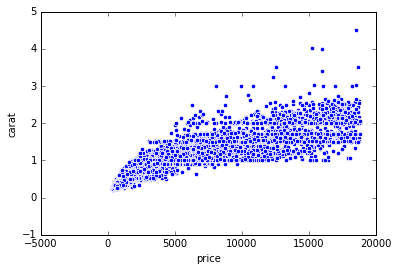

In [28]:
sns.scatterplot(df['price'], df['carat']) 

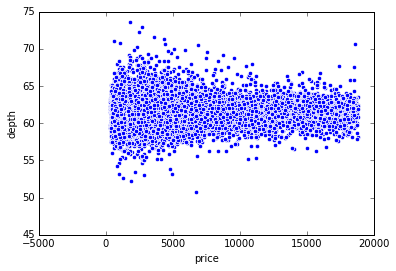

In [8]:
sns.scatterplot(df['price'], df['depth']) 

In [29]:
(df['x'] == 0).all()

False

In [30]:
df.eq(0).any().any()

True

In [31]:
df.isin([0.000000]).any().any()

True

In [32]:
#Let us see if we can get those records with nan

df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,5,6,5,NaN,57.0,4.50,4.44,2.74,803
86,0.74,5,5,4,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,4,4,5,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,4,5,4,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,3,4,6,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,3,3,7,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,4,2,6,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,3,5,5,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,5,6,6,NaN,57.0,5.12,5.09,3.18,1882


In [33]:
df.median()

carat         0.70
cut           4.00
color         3.00
clarity       6.00
depth        61.80
table        57.00
x             5.69
y             5.70
z             3.52
price      2375.00
dtype: float64

In [34]:
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,3.909702,3.702967,6.053577,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.113165,1.358064,1.646749,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,1.000000,1.000000,3.000000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,3.000000,3.000000,5.000000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,4.000000,3.000000,6.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,5.000000,5.000000,7.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,5.000000,6.000000,10.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [35]:
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

In [36]:

df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [37]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [38]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [39]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


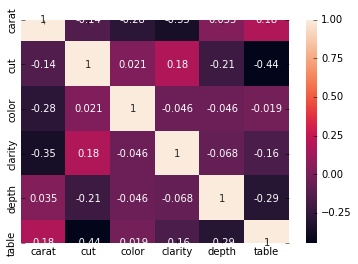

In [40]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
carat      26933 non-null float64
cut        26933 non-null int64
color      26933 non-null int64
clarity    26933 non-null int64
depth      26933 non-null float64
table      26933 non-null float64
x          26933 non-null float64
y          26933 non-null float64
z          26933 non-null float64
price      26933 non-null int64
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [42]:
print('Before: ',df.shape)
# Replace 0 in x,y & z to Nan and remove all missing values
df.x = df.x.replace(to_replace = 0 , value =np.nan)
df.y = df.x.replace(to_replace = 0 , value =np.nan)
df.z = df.x.replace(to_replace = 0 , value =np.nan)
df.dropna(inplace=True)
print('After: ',df.shape)

Before:  (26933, 10)
After:  (26931, 10)


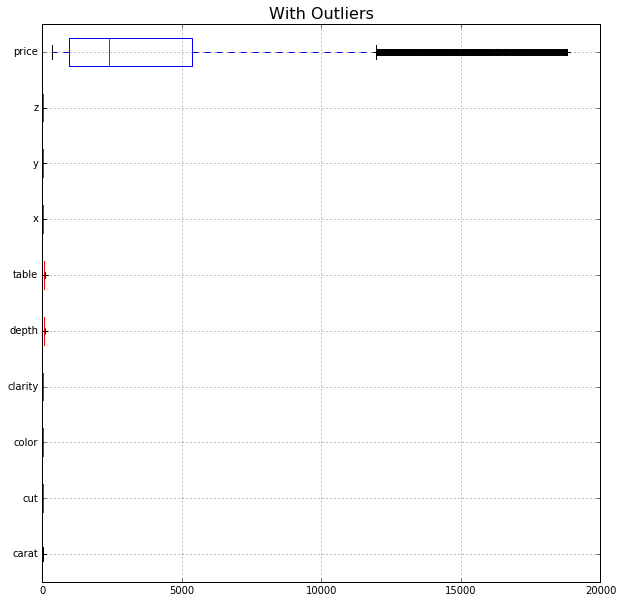

In [43]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [44]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

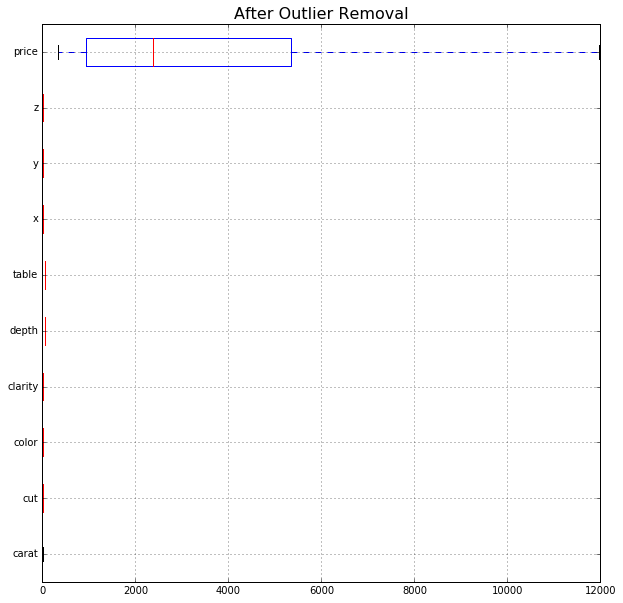

In [46]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

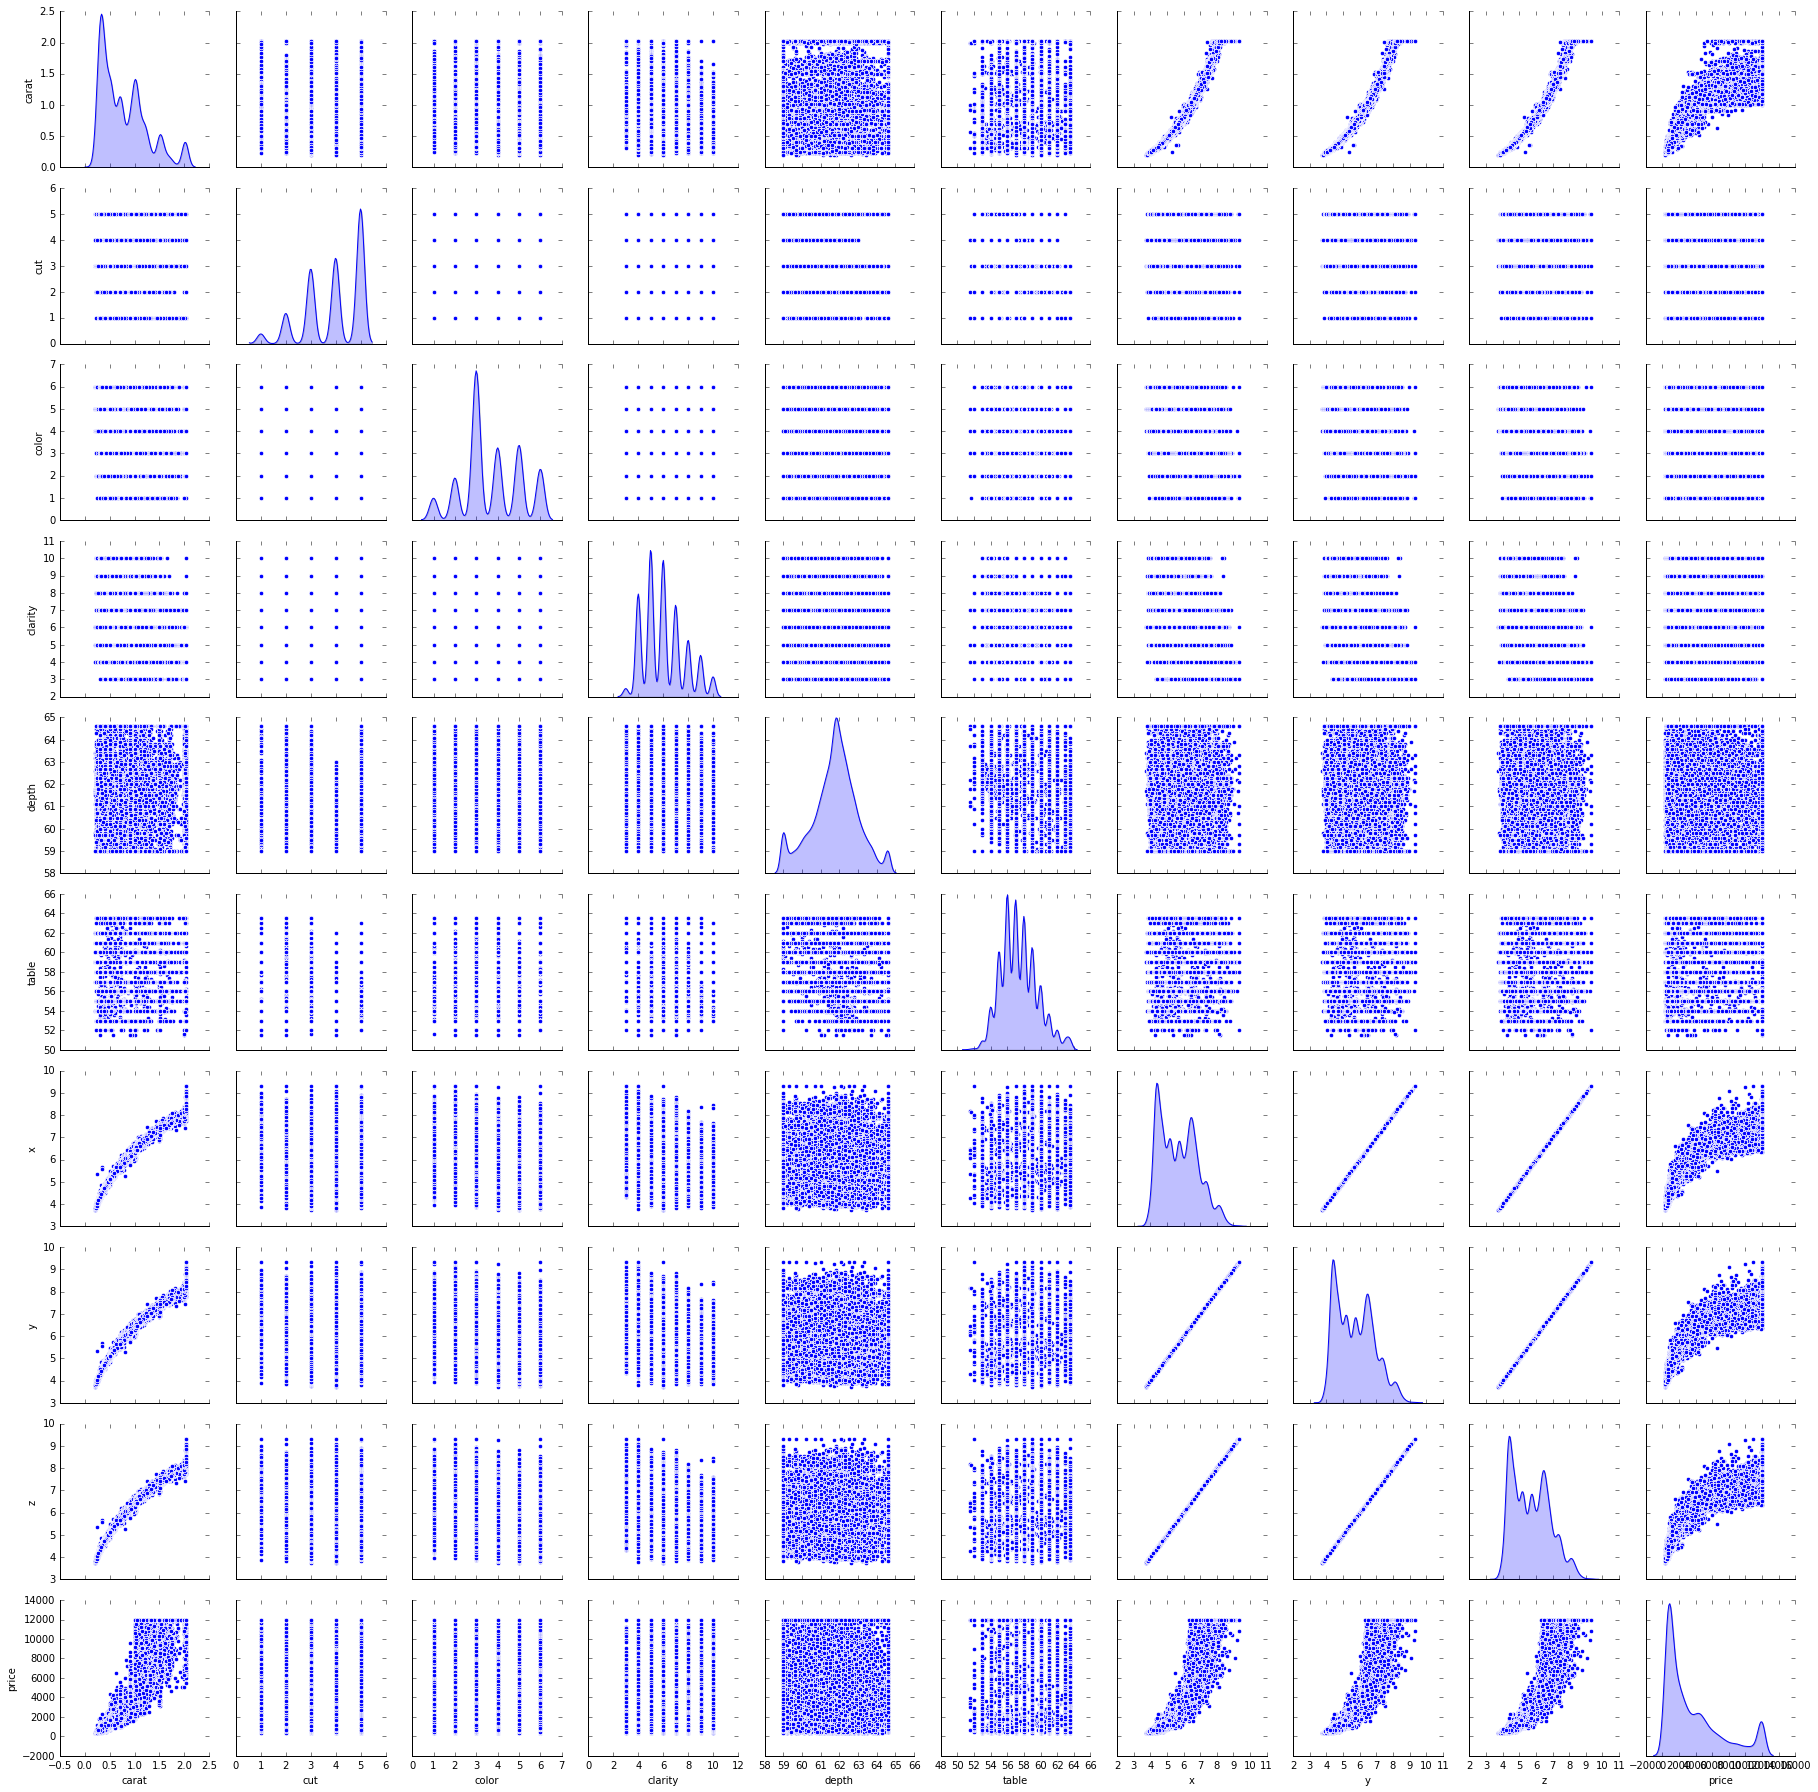

In [47]:
df_attr = df.iloc[:, 0:10]
sns.pairplot(df_attr, diag_kind='kde') 

In [48]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [49]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5.0,5.0,5.0,62.1,58.0,4.27,4.27,4.27
1,0.33,4.0,3.0,10.0,60.8,58.0,4.42,4.42,4.42
2,0.90,3.0,5.0,8.0,62.2,60.0,6.04,6.04,6.04
3,0.42,5.0,4.0,7.0,61.6,56.0,4.82,4.82,4.82
4,0.31,5.0,4.0,9.0,60.4,59.0,4.35,4.35,4.35


In [50]:
from sklearn.model_selection import train_test_split

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [52]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8768.010311896847
The coefficient for cut is 99.54258748597687
The coefficient for color is 317.5723252053741
The coefficient for clarity is 443.46845713711105
The coefficient for depth is -42.69277800947897
The coefficient for table is -19.958882266308166
The coefficient for x is -119.76183598704735
The coefficient for y is -119.76183598704777
The coefficient for z is -119.76183598704783


In [54]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1626.8623517657452


In [55]:
regression_model.score(X_test, y_test)

0.9287982791346664

In [56]:
# R square on training data
regression_model.score(X_train, y_train)

0.9287878809454727

In [57]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9287982791346664

In [58]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

924.652237581284

In [59]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

927.2691977843609

In [60]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2275,0.300,5.0,5.0,6.0,61.2,55.0,4.35,4.35,4.35,844.00
12311,1.230,5.0,3.0,7.0,61.6,57.0,6.84,6.84,6.84,10859.00
5030,1.100,2.0,5.0,4.0,63.3,56.0,6.53,6.53,6.53,4065.00
8481,1.500,4.0,2.0,6.0,61.1,60.0,7.33,7.33,7.33,9471.00
25220,2.025,3.0,2.0,4.0,62.8,60.0,7.99,7.99,7.99,11971.25


In [61]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5.0,5.0,5.0,62.1,58.0,4.27,4.27,4.27,499.0
1,0.33,4.0,3.0,10.0,60.8,58.0,4.42,4.42,4.42,984.0
2,0.90,3.0,5.0,8.0,62.2,60.0,6.04,6.04,6.04,6289.0
3,0.42,5.0,4.0,7.0,61.6,56.0,4.82,4.82,4.82,1082.0
4,0.31,5.0,4.0,9.0,60.4,59.0,4.35,4.35,4.35,779.0


In [62]:
expr= 'price ~ carat + cut + color + clarity+ depth + table + x + y + z'

In [63]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -1626.862352
carat        8768.010312
cut            99.542587
color         317.572325
clarity       443.468457
depth         -42.692778
table         -19.958882
x            -119.761836
y            -119.761836
z            -119.761836
dtype: float64

In [64]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.511e+04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:48:10   Log-Likelihood:            -1.5549e+05
No. Observations:               18851   AIC:                         3.110e+05
Df Residuals:                   18843   BIC:                         3.111e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1626.8624    604.008     -2.693      0.0

In [65]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [66]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

924.6522375812852

In [67]:
np.sqrt(lm1.mse_resid) #another way

924.8485023195157

In [68]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

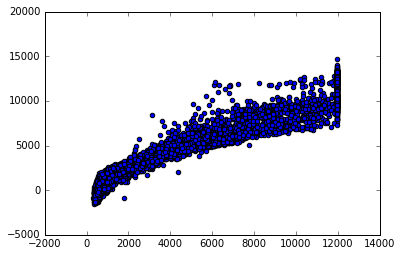

In [69]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [70]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1626.86) * Intercept + (8768.01) * carat + (99.54) * cut + (317.57) * color + (443.47) * clarity + (-42.69) * depth + (-19.96) * table + (-119.76) * x + (-119.76) * y + (-119.76) * z + 

In [71]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [72]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1668800612466133
The coefficient for cut is 0.031883430918668965
The coefficient for color is 0.12416640110664752
The coefficient for clarity is 0.21102912995504497
The coefficient for depth is -0.014935199892316453
The coefficient for table is -0.012339513398843108
The coefficient for x is -0.038862254479976946
The coefficient for y is -0.038862254479977015
The coefficient for z is -0.038862254479977015


In [74]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.2760137400082174e-16


In [75]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9287855404883404

In [76]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [77]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2668603745625415

In [78]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

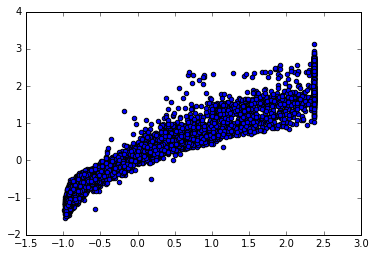

In [79]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

C:\Users\manuraj.ls\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [82]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 107.63137365095129
cut ---> 14.9104409406925
color ---> 9.341813867475079
clarity ---> 17.406123695979375
depth ---> 585.1936954174886
table ---> 575.661728013502
x ---> inf
y ---> inf
z ---> inf
